In [1]:
import numpy as np
from keras import layers,models ## CAPAS Y MODELO PARA GENERAR LA RED
from keras.utils import to_categorical 
from keras.datasets import mnist ## BAJAS BASE DE DATOS DE IMAGENES
import matplotlib.pyplot as plt ## GRAFICAR

In [2]:
#### CARGAMOS LA BASE DE DATOS DE IMAGENES EN FORMA MATRICIAL
#### KERAS TIENE BASES YA PRECARGADAS COMO LA SIGUIENTE:
(train_data,train_labels),(test_data,test_labels)=mnist.load_data()## UTILIZAMOS LA API UBICADA EN TENSOR FLOW

11490434/11490434 [==============================] - 18s 2us/step


In [3]:
"""
train_data CONTIENE LAS IMAGENES EN FORMA MATRICIAL
EL FORMATO DE LOS VALORES POSIBLES ESTAN UN RANGO DE 0 A 255
COMO LOS COLORES.
Y TRAIN_LABELS ME INDICA  A QUE VALOR CORRESPONDE EL SET DE IMAGENES
"""
train_data.shape

(60000, 28, 28)

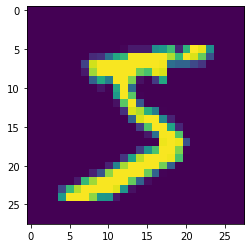

In [4]:
# (6000,28,28) 6000 IMAGENES COMPRIMIDAS DE FORMA MATRICIAL EN M28X28

## OBSERVEMOS A QUE VALOR SE REFIERE:
plt.imshow(train_data[0]) ## PERMITE OBSERVAR IMAGENES
## SET DE PIXELES.

PODEMOS OBSERVAR QUE EL SET MATRICIAL PARA ESTE CASO CORRESPONDE A UN CINCO, POR LO TANTO SI VEMOS LA VARIABLE TRAIN_LABEL EN DICHA POSICIÓN TAMBIEN REPRESENTARA UN 5

In [5]:
train_labels[0]

5

In [7]:
### GENERAMOS NUESTRA RED
model=models.Sequential()
model.add(layers.Dense(512,activation="relu",input_shape=(28*28,))) ## ENTRADA UNA MATRIZ 28*28
model.add(layers.Dense(10,activation="softmax")) ## TENEMOS 10 POSIBLES VALORES.

In [10]:
### LO SIGUIENTE QUE HACEMOS ES COMPILAR EL MODELO, GENERANDO UNA FUNCIÓN DE PERDIDA Y OPTIMIZADOR 
model.compile(optimizer="rmsprop",
loss="categorical_crossentropy",metrics="accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
#AHORA ANTES DE ENTRENAR LA RED, TENEMOS QUE FACILITAR LOS DATOS PARA LA RED, EN ESTE CASO 
#VAMOS A REAGRUPAR LOS DATOS DE LA RED EN UN CONJUNTO DE 2 DIMENSIONES YA QUE ES MAS FACIL PARA LA RED REALIZAR DICHO PROCESO
# RECORDEMOS QUE ORIGINALMENTE ERA UN ARREGLO DE 3,
x_train=train_data.reshape((60000,28*28))
x_train=x_train.astype("float32")/255 # NORMALIZAMOS LOS VALORES Y PASAMOS TODO A FLOTANTES DEBIDO A QUE ES MAS FACIL PARA LA RED
x_test=test_data.reshape((10000,28*28))
x_test=x_test.astype("float32")/255 # NORMALIZAMOS LOS VALORES Y PASAMOS TODO A FLOTANTES DEBIDO A QUE ES MAS FACIL PARA LA RED

In [19]:
## OBSERVEMOS QUE TENEMOS:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [21]:
train_labels[0]

5

In [22]:
y_train[0] ## DE ESTA MANERA LA RED NEURONAL MANEJA MUCHO MEJOR LA INFORMACIÓN DE MANERA VECTORIAL.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [25]:
## AHORA ENTRENAMOS NUESTRO MODELO:
model.fit(x_train,y_train,epochs=8,batch_size=128)

Epoch 1/8
469/469 [==============================] - 6s 13ms/step - loss: 0.0283 - accuracy: 0.9916
Epoch 2/8
469/469 [==============================] - 6s 13ms/step - loss: 0.0216 - accuracy: 0.9940
Epoch 3/8
469/469 [==============================] - 6s 13ms/step - loss: 0.0161 - accuracy: 0.9955
Epoch 4/8
469/469 [==============================] - 6s 14ms/step - loss: 0.0127 - accuracy: 0.9965
Epoch 5/8
469/469 [==============================] - 6s 13ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 6/8
469/469 [==============================] - 6s 13ms/step - loss: 0.0077 - accuracy: 0.9978
Epoch 7/8
469/469 [==============================] - 6s 14ms/step - loss: 0.0061 - accuracy: 0.9984
Epoch 8/8
469/469 [==============================] - 6s 14ms/step - loss: 0.0047 - accuracy: 0.9987


In [26]:
##EVALUAMOS COMO FUNCIONA NUESTRA RED DE DATOS:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0774 - accuracy: 0.9829


[0.07737915217876434, 0.9829000234603882]

In [27]:
### FUNCIONES DE PERDIDA:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat-y)
    else:
        return np.mean((y_hat-y)**2)

In [29]:
#TIPOS DE DATOS DE ENTRADA

#ESCALAR
X=np.array(42)
print(X.ndim)
X.shape


0


()

In [30]:
X=np.array([1,2,3,5])
print(X.ndim)
X.shape

1


(4,)

In [32]:
X=np.array([[1,2,3,5],[1,2,3,5],[1,2,3,5]])
print(X.ndim)
X.shape

2


(3, 4)

In [33]:
X=np.array([[[1,2,3,5],[1,2,3,5],[1,2,3,5]],[[1,2,3,5],[1,2,3,5],[1,2,3,5]],[[1,2,3,5],[1,2,3,5],[1,2,3,5]]])
print(X.ndim)
X.shape
"""
(3,3,4) 3 ELEMENTOS GLOBALES, CON MATRICES DE 3*4
"""

3


(3, 3, 4)

In [34]:
## HERRAMIENTA SALVADORA DE NUMPY RESHAPE
Matriz=np.array([[0,1],
                 [2,3],
                 [4,5],
                 [6,7]
                ])

Matriz.shape

(4, 2)

In [35]:
Matriz=Matriz.reshape(8,1)
Matriz
### LO IMPORTANTE ES QUE LA NUEVA FORMA CUADRE CON MIS VALORES ORIGINALES

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [37]:
#TRANSPUESTA ME INVIERTE LAS DIMENSIONES DE LA MATRIZ, (4,2) LA LLEVA A (2,4)
Matriz=np.array([[0,1],
                 [2,3],
                 [4,5],
                 [6,7]
                ])

#np.transpose(Matriz) # FORMA 1

Matriz.T # FORMA 2

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])